And in this short video, we're going to be implementing the `generate` node. <br> 
the generation node is going to be the last node that is going to be executed. 

We execute this node after:
- we already retrieve the information, the relevant documents
- grade the retrieved docs and filtered out the documents that were not relevant to our query
- even performed a search for the question that we want to answer. 

So after we have all of the documents, we can augment the original query. And now it's time to generate.

## generate chain:

```python
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0)
prompt = hub.pull("rlm/rag-prompt")

generation_chain = prompt | llm | StrOutputParser()
```

`StrOutputParser`: it is simply going to take our message. And it's going to get the content from it and turn it into a string.

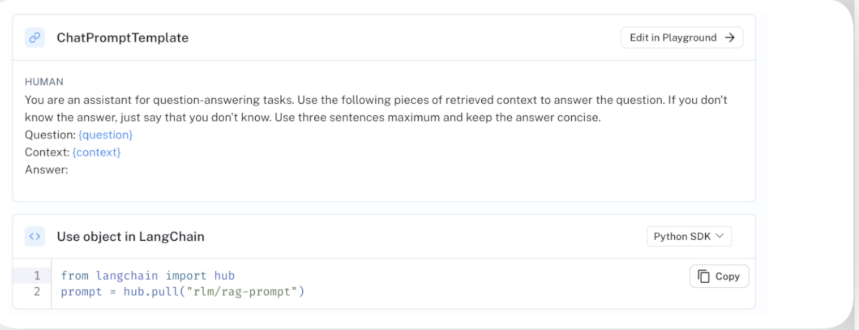

# generate node

In [ ]:
from typing import Any, Dict

from graph.chains.generation import generation_chain
from graph.state import GraphState


def generate(state: GraphState) -> Dict[str, Any]:
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]

    generation = generation_chain.invoke({"context": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}


```python
documents = state["documents"]
```
these are filtered docs because you already passed `grade_document` node and you updated documents with filtered_docs.

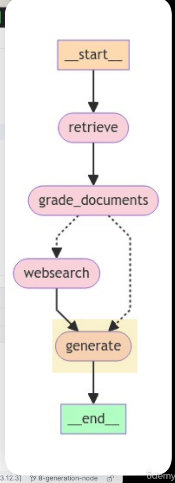

```python
return {"documents": documents, "question": question, "generation": generation}
```

add `question` to return values to update the graph state afterwards.